# TP2 CSM 22/23 SV
## Docente: Gonçalo Valadão
### Elementos do grupo:
### Roman Ishchuk 43498
### Eduardo Marques 45977
### Miguel Estevinha 49779

### Codificação

O processo de transformação de uma mensagem ou dados num formato que pode ser transmitido ou armazenado é conhecido como codificação de mensagens, muitas vezes referido como codificação de dados ou simplesmente codificação. A codificação de dados é importante para um armazenamento seguro (evitar a perda de dados ou erros) e permite reduzir a memória necessária para o armazenamento. Existem muitas técnicas diferentes de codificação que são utilizadas para diferentes fins, tais como compressão, encriptação, correcção de erros, e representação de dados.

### Compressão

Existem dois tipos principais de técnicas de compressão: a compressão sem perdas e a compressão com perdas.

A compressão sem perdas é permite a reconstrução completa dos dados originais a partir dos dados comprimidos. Isto indica que não se perdem dados durante a compressão. Alguns exemplos de algoritmos de compressão sem perdas são: Lempel-Ziv-Welch (LZW), codificação em comprimento e codificação Huffman.

A compressão com perdas é uma técnica de compressão em que se perde alguma informação. Isto implica que os dados comprimidos não podem ser utilizados para reconstruir completamente os dados originais. Alguns exemplos de algoritmos de compressão com perdas: JPEG para fotos, MP3 para áudio e MPEG para vídeo.

As técnicas de compressão com perdas são particularmente boas para reduzir a quantidade de informação duplicada ou desnecessária nos dados. Por exemplo, pixels da mesma cor numa imagem poderiam ser combinados num único valor sem degradar severamente a qualidade geral da imagem.

### Algoritmo de Huffman
O foco deste projeto é o o algoritmo de Huffman. Este algoritmo é uma técnica de compressão que é amplamente utilizada na transmissão e armazenamento de dados. Foi desenvolvido por David A. Huffman em 1952 e baseia-se na ideia de substituir símbolos que ocorrem com mais freqência por códigos mais curtos, e símbolos que ocorrem com menor frequência por códigos mais longos. Ao fazê-lo, o tamanho total da mensagem é reduzido, o que torna a transmissão e o armazenamento mais eficientes.

Para calcular a frequência com que cada símbolo aparece na mensagem, o algoritmo de Huffman analisa, em primeiro lugar, a mensagem na totalidade. Isto é possível através da criação de uma tabela de frequência ou histograma dos símbolos da mensagem. Asseguir é criada uma árvore binária que represente os símbolos e as suas ocorrências.

Os dois caracteres com as frequências mais baixas são unidos para formar um novo símbolo, somando tamém os números das suas ocorrências, formando assim a árvore de Huffman. Este processo é repetido até restarem dois símbolos finais. Uma vez construída a árvore Huffman, o passo seguinte é atribuir um código binário a cada símbolo. Isto é feito percorrendo a árvore desde a raiz até ao início, atribuindo um 0 a cada ramo esquerdo e um 1 a cada ramo direito. O código resultante para cada símbolo é a sequência de 0s e 1s que representam o caminho da raiz para o nó da árvore que representa esse símbolo.

Finalmente, a mensagem original é substituída pelo código binário para cada símbolo, o que resulta numa versão comprimida da mensagem. A mensagem comprimida pode então ser transmitida ou armazenada de forma mais eficiente do que a mensagem original.

Para descodificar a mensagem comprimida, o receptor ou leitor da mensagem utiliza a árvore Huffman para traduzir o código binário de volta para os caracteres originais.

In [1]:
from time import time
from os import path
import numpy as np
import cv2
import matplotlib.pyplot as plt

import re

A função calc_ocorrencias recebe um array de símbolos e cálcula o número de ocorrências de cada símbolo, criando dicionário com a seguinte estrutura:

| Símbolo | Frequência |
|:-------:|:----------:|

In [2]:
def calc_ocorrencias(simbolos):
    key, counts = np.unique(simbolos, return_counts=True)
    return dict(zip(key, counts))

A função gen_huff_table recebe um dicionário com símbolos e as suas respetivas frequências, e vai ser responsável por criar uma tabela com os símbolos e os seus respetivos códigos binários.

A função segue os seguintes passos:

1. Separação dos símbolos e das frequências que estão contidas no dicionário em arrays separados.
2. É efectuada uma cópia do dicionário original, pois este vai sofrer alterações.
3. É criado um array vazio com o tamanho do número total de símbolos para armazenar os códigos binários.
4. É criado um array com tuplos de dimensão 2, quais o seu primeiro elemento é o índice da posição do array.
5. É efectuada uma cópia do array de frequências, pois este vai sofrer alterações.
6. É criado um array dos índices ,da cópia do array de frequências, por ordem crescente (utilizando a função do numpy argsort).
7. Guardamos os primeiros dois índices do array de índices criados no ponto 6. Estes primeiros dois índices representam as duas menores frequências dos símbolos.
8. É percorrido o tuplo do array criado no ponto 4 com os índices do ponto 7, acrescentando o valor 0 nos índices, com a frequência menor, no array de códigos e acrescentando o valor 1 nos índicesm com a segunda menor frequência, no array de códigos.
9. Juntamos o segundo menor índice (do ponto 7) ao menor índice (do ponto 7) no array do ponto 4, removendo o segundo menor índice do array.
10. Juntamos a segunda menor frequência à primeira menor frequência na cópia do array de frequências (do ponto 5), removendo a segunda menor frequência do array.
11. Juntamos o símbolo com a segunda menor frequência com o símbolo com a primeira menor frequência na cópia do array de símbolos (ponto 1), removendo o símbolo com a segunda menor frequência.
12. Repetimos os pontos 6 a 12 até o array de símbolos (ponto 11) só ter 1 elemento.
13. Criamos um dicionário onde as keys são os símbolos, e as values são os respetivos códigos.
14. Return dicionário.

In [3]:
def gen_huff_table(dicionario):

    simbolos = []
    probabilidades = []

    for k in dicionario.keys():
        simbolos.append(k)

    for v in dicionario.values():
        probabilidades.append(v)

    tam_simb = len(simbolos)

    simb_aux = simbolos.copy()
    codigos = [''] * tam_simb
    idx_symbolos = [(i,) for i in range(tam_simb)]
    prob_arr = probabilidades

    while len(simb_aux) > 1:

        sort_prob = np.argsort(prob_arr)
        idx1 = sort_prob[0]
        idx2 = sort_prob[1]
        
        for i in idx_symbolos[idx1]:
            codigos[i] = '0' + codigos[i]
        for i in idx_symbolos[idx2]:
            codigos[i] = '1' + codigos[i]
        
        idx_symbolos[idx1] = idx_symbolos[idx1] + idx_symbolos[idx2]
        idx_symbolos.remove(idx_symbolos[idx2])
        
        prob_arr[idx1] = prob_arr[idx1] + prob_arr[idx2]
        prob_arr = np.delete(prob_arr, idx2)
        
        simb_aux[idx1] = simb_aux[idx1] + simb_aux[idx2]
        simb_aux = np.delete(simb_aux, idx2)
    
    huff_table = {simbolos[s] : codigos[s] for s in range(tam_simb)}

    return huff_table



Para testar o gen_huff_table criamos um array de símbolos da palavra 'otorrinolaringologista', e procedemos ao cálculo das frequências de cada símbolo do array. O resultado é um dicionário do tipo símbolo : numero de ocorrências

{'a': 2, 'g': 2, 'i': 3, 'l': 2, 'n': 2, 'o': 5, 'r': 3, 's': 1, 't': 2}

De seguida ordenamos o dicionário por ordem decrescente pelo número de ocorrências:

{'o': 5, 'i': 3, 'r': 3, 'a': 2, 'g': 2, 'l': 2, 'n': 2, 't': 2, 's': 1}

Finalmente, invocamos a função gen_huff_table com o dicionário ordenado. O resultado é o seguinte: 

{'o': '01', 'i': '100', 'r': '101', 'a': '1101', 'g': '1110', 'l': '1111', 'n': '000', 't': '001', 's': '1100'}

Este dicionário é a tabela codificada de Huffman. Conseguimos ver que, o número de símbolos diferentes no array 'otorrinolaringologista' é 9. Para codificar 9 símbolos preciamos de 4 bits. Conseguimos ver que a criação da tabela foi feita com sucesso, pois, o número máximo de bits utilizado para codificar é 4. Também, os símbolos com maior ocorrência têm códigos menores. O símbolo 'o' tem 5 ocorrências e é codificado por '01' (2 bits), e os símbolos 'i' e 'r' ambos têm 3 ocorrências, são codificados por 3 bits cada.

In [4]:
simb = ['o', 't', 'o', 'r', 'r', 'i', 'n', 'o', 'l', 'a', 'r', 'i', 'n', 'g', 'o', 'l', 'o', 'g', 'i', 's', 't', 'a']
dicionario = calc_ocorrencias(simb)
print(dicionario)
freq = sorted(dicionario.items(), key=lambda x: x[1], reverse=True)
dicionario = dict(freq)
print(dicionario)
ht = gen_huff_table(dicionario)
print(ht)

{'a': 2, 'g': 2, 'i': 3, 'l': 2, 'n': 2, 'o': 5, 'r': 3, 's': 1, 't': 2}
{'o': 5, 'i': 3, 'r': 3, 'a': 2, 'g': 2, 'l': 2, 'n': 2, 't': 2, 's': 1}
{'o': '01', 'i': '100', 'r': '101', 'a': '1101', 'g': '1110', 'l': '1111', 'n': '000', 't': '001', 's': '1100'}


Após a criação da tabela de Huffman, conseguimos proceder a codificação de mensagens. Para tal efeito, criamos a função encode_huff. Esta função recebe uma mensagem, e um dicionário (tabela de Huffman). Para codificar a mensagem, vai percorrer cada símbolo da mensagem, concatenando o seu código numa string. Finalmente retorna a String com o código da mensagem.

In [5]:
def encode_huff(mensagem, dicionario):
    msg_cod = ''

    for letra in mensagem:
        msg_cod += dicionario[letra]

    return msg_cod


Para descodificar o código, implementamos a função decode_huff. Esta função recebe a mensagem codificada e um dicionário (tabela de Huffman). A função começa por inverter as keys e os values do dicionário que é a tabela de Huffman. Começa por pegar no primeiro elemento do código e procura no dicionário invertido se encontra um "match". Caso encontre, concatena o símbolo do código, e retira o/os elementos do código já descodificados. Caso não encontre um "match", acrescenta o próximo elemento do código ao que já procurou, e efectua a procura outra vez na tabela. Repete este processo até descodificar todo o código. Retorna a mensagem descodificada.

In [6]:
def decode_huff(msg_cod, dicionario):
    
    cod_simb = {v:k for k,v in dicionario.items()}    
    msg = []
    start = 0
    end = 1
    key = msg_cod[start:end]
    
    while (end < len(msg_cod)):
        while not(key in cod_simb):
            end += 1
            key = msg_cod[start:end]
        
        msg.append(cod_simb[key])
        start = end
        end = start + 1
        key = msg_cod[start:end]
        
    return msg

Para testar o encode_huff e o decode_huff, utilizamos a mensagem "otorrinolaringologista", pois já temos uma tabela de Huffman para os símbolos desta mensagem (gerado anteriormente). Ao codificarmos, passamos à função a mensagem e a tabela de huffman.

Mensagem original:
"otorrinolaringologista"

Dicionário utilizado:
{'o': '01', 'i': '100', 'r': '101', 'a': '1101', 'g': '1110', 'l': '1111', 'n': '000', 't': '001', 's': '1100'}

Mensagem codificada:
01001011011011000000111111101101100000111001111101111010011000011101

Conseguimos concluir que codifica bem, pois, vendo os dois primeiros símbolo da mensagem 'o' e 't', os seus códigos, respetivamente são '01' e '001'. Conseguimos encontrá-los no início da mensagem nos respectivos lugares.

Ao descodificarmos a mensagem, passamos a mensagem codificada e a tabela de Huffman. A mensagem descodificada é: otorrinolaringologista.


In [7]:
msg_cod = encode_huff("otorrinolaringologista", ht)
print(ht)
print(msg_cod)
mensagem = decode_huff(msg_cod, ht)
print(mensagem)
print(''.join(mensagem))

{'o': '01', 'i': '100', 'r': '101', 'a': '1101', 'g': '1110', 'l': '1111', 'n': '000', 't': '001', 's': '1100'}
01001011011011000000111111101101100000111001111101111010011000011101
['o', 't', 'o', 'r', 'r', 'i', 'n', 'o', 'l', 'a', 'r', 'i', 'n', 'g', 'o', 'l', 'o', 'g', 'i', 's', 't', 'a']
otorrinolaringologista


Após a codificação da mensagem, criamos uma função para codificar a tabela de Huffman e a mensagem codificada numa só mensagem utilizando um header. Isto é importante, pois, sem a tabela de huffman, a mensagem nunca poderá ser descodificada. O cabeçalho é composto por:

              3 bits                   8 bits         
        nº de bits de stuffing       nº de símbolos       

Os 3 primeiros bits referem-se ao stuffing. Stuffing são bits que se acrescentam no final do ficheiro para este ser divisível por 8. Isto é importante para os algoritmos de compressão e descompressão, pois podem-se causar erros, perdendo-se informação. Assim, no início da mensagem, os 3 primeiros bits são o número de bits de stuffing que são adicionados no final. O número de zeros a adicionar pode variar de 0 a 7. Os próximos 8 bits correspondem ao número de símbolos únicos do dicionário. Esta parte acima referida só aparece 1 vez no ficheiro.

De seguida, para cada um dos elementos da tabela, a informação é guardada da maneira seguinte:



        8 bits                            5 bits                                 x bits
       símbololo                tamanho do código do símbolo                código de símbolo


Os 8 primeiros bits são o símbolo em questão, os próximos 5 bits são o tamanho do símbolo, e depois um x de bits para o código do símbolo. Assim sucessivamente até ser percorrida toda a tabela de Huffman.

Após a escrita da tabela, é colocada a mensagem codificada e finalmente, os bits de stuffing (caso necessário).


In [8]:
def encode_table(huff_table, msg_codif):

    enc_t = ''
    bit_fin = '0'
    
    nSimb = len(huff_table.keys())
    nSimb_aux = nSimb

    if nSimb == 256:
            nSimb_aux = nSimb - 1

    #precisamos de 1 a 256 simbolos, porque o simbolo 0 é um simbolo

    nSimb_b = format(nSimb_aux, 'b').zfill(8)

    enc_t += nSimb_b

    for item in huff_table.items():
        #primeira pos é o simb e segunda é o código associado

        simb = int(item[0])
        simb_b = format(simb, 'b').zfill(8)

        cod = item[1]
        tam_cod = len(cod)
        tam_cod_b = format(tam_cod, 'b').zfill(5)

        enc_t += simb_b + tam_cod_b + cod

    "stuffing"
    enc_t +=  msg_codif

    num_stuff = 8 - ((len(enc_t) + 3)%8)

    if(num_stuff == 8):
        num_stuff = 0
    
    num_stuf_b = format(num_stuff, 'b').zfill(3)

    if nSimb == 256:
        stuf_b = bit_fin * (num_stuff-1)
        stuf_b = stuf_b + '1'
    else:
        stuf_b = bit_fin * num_stuff

    enc_t = num_stuf_b + enc_t + stuf_b

    return enc_t


Conseguirmos descodificar a mensagem toda, necessita-se de separar a tabela de Huffman e a mensagem em si.

In [9]:
def decode_table(msg_cod):

    table = dict()

    #número de bits de stuffing
    num_stuff = int(msg_cod[:3], 2)

    flag_256 = msg_cod[-1:]

    #retiramos os bits de stuffing no final do ficheiro
    msg_noStuffing = msg_cod[3:-num_stuff]
    
    #print(num_stuff)
    
    #número de símbolos únicos
    num_simb = int(msg_noStuffing[:8], 2)
    

    if flag_256 == '1':
        num_simb = num_simb + 1

    indice_init = 8
    indice_end = indice_init + 8

    #aqui começa-se a desencifrar a tabela de Huffman
    for s in range(num_simb):

        #símbolo
        simb = int(msg_noStuffing[indice_init:indice_end], 2)

        indice_init += 8
        indice_end += 5

        #tamanho do código do símbolo
        tam_cod = int(msg_noStuffing[indice_init:indice_end], 2)

        indice_init += 5
        indice_end += tam_cod

        #código em si
        cod = msg_noStuffing[indice_init:indice_end]

        indice_init += tam_cod
        indice_end += 8

        table[simb] = cod
    
    #O que resta é a mensagem após ser tirada a tabela e o stuffing
    mensagem = msg_noStuffing[indice_init:]

    return table, mensagem

Para escrever a sequência de bits(mensagem e tabela codificada), é implementada a função write2file.
A sequência é convertida para inteiro e em seguida em bytes, no final é escrita no ficheiro de nome definido pelo segundo parâmetro da função.
Esta função converte e escreve a sequência de bits no ficheiro 1 byte de cada vez, pois com os stuffing bits, a sequência de bits terá um 
número bits multiplo de 8.

In [10]:
def write2file(seq_bit, filename):
    file = open(filename, 'wb')
    for i in range(len(seq_bit)):
        b = seq_bit[i*8:(i+1)*8]
        
        if len(b) > 0:
            nint = int(b,2)
            nbyte = nint.to_bytes ( 1, 'big')
            file.write(nbyte)            
            
    file.close()   

Para ler o ficheiro com objetivo de obter a sequncia bits escrita no mesmo, foi implementada a função read_file.
   Esta função lê os dados contidos no ficheiro bin de byte a byte, em seguida converte o byte em inteiro 
   e depois numa sequência de 8 bits em string. Assim, vai se formando a sequência de bits que representa a mensagem e a 
   tabela codificadas e posteriormente descodificadas pela  função decode_table.

In [11]:
def read_file(filename):
    
    seq_bit = ""
    file = open(filename, 'rb')
    byte = ''
    while byte := file.read(1):
        nint = int.from_bytes(byte, "big") 
        b = format(nint, 'b')
        if(len(b) < 8):
            for i in range(int(8-len(b))): 
                b = '0' + b
                
        seq_bit +=b
        
    file.close()
    
    return  seq_bit 

Dados do ficheiro original: 
[73 73 42 ... 25  3  0]

Cálculo do número de ocorrências dos símbolos do ficheiro: 
{0: 5487, 1: 4041, 2: 3343, 3: 2179, 4: 2077, 5: 1226, 6: 1507, 7: 1295, 8: 1517, 9: 862, 10: 1223, 11: 610, 12: 1164, 13: 567, 14: 1054, 15: 824, 16: 1316, 17: 656, 18: 975, 19: 512, 20: 1016, 21: 444, 22: 818, 23: 418, 24: 1095, 25: 599, 26: 1007, 27: 772, 28: 1435, 29: 1371, 30: 2513, 31: 2074, 32: 2384, 33: 1442, 34: 1555, 35: 1031, 36: 1440, 37: 1005, 38: 1231, 39: 847, 40: 1240, 41: 856, 42: 1090, 43: 723, 44: 1026, 45: 588, 46: 781, 47: 561, 48: 1120, 49: 674, 50: 783, 51: 531, 52: 862, 53: 508, 54: 737, 55: 433, 56: 916, 57: 555, 58: 778, 59: 551, 60: 847, 61: 651, 62: 924, 63: 654, 64: 2333, 65: 1286, 66: 1270, 67: 928, 68: 1068, 69: 657, 70: 770, 71: 1015, 72: 1038, 73: 679, 74: 862, 75: 567, 76: 846, 77: 540, 78: 702, 79: 566, 80: 1043, 81: 593, 82: 779, 83: 532, 84: 737, 85: 440, 86: 619, 87: 389, 88: 752, 89: 446, 90: 626, 91: 348, 92: 580, 93: 292, 94: 510, 95

C:\Users\dadum\AppData\Local\Temp\ipykernel_9128\3490194677.py:36: RuntimeWarning: overflow encountered in ubyte_scalars
  simb_aux[idx1] = simb_aux[idx1] + simb_aux[idx2]


Tempo de encode huff, encode table e write to file:  0.7225346565246582
Acabámos de escrever no fichiero a seq de bits


Tempo do read file e decode table:  0.3284289836883545

Tabela após ser lida do ficheiro
{0: '01000', 1: '110010', 2: '100101', 128: '011010', 30: '001000', 32: '000001', 64: '1111110', 192: '1110111', 3: '1110100', 4: '1101100', 31: '1101011', 224: '1100000', 160: '1010110', 96: '1010100', 129: '1001000', 34: '0111110', 8: '0111000', 6: '0110111', 33: '0101110', 36: '0101101', 28: '0101100', 29: '0100100', 16: '0011010', 7: '0010110', 65: '0010100', 66: '0010010', 40: '0001100', 38: '0001010', 5: '0001001', 10: '0001000', 130: '0000100', 12: '11111011', 226: '11110111', 48: '11110010', 193: '11110001', 228: '11101101', 24: '11101011', 42: '11100111', 240: '11100110', 162: '11100011', 68: '11100010', 14: '11011111', 80: '11011101', 98: '11011100', 161: '11011011', 72: '11011010', 97: '11010101', 35: '11010100', 44: '11010010', 232: '11010001', 20: '11001111', 71: '11

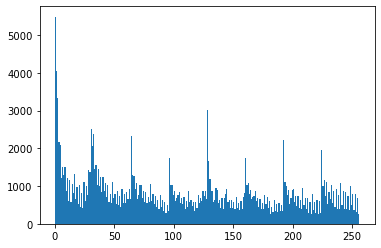

In [12]:
#testes
# Ler um dos ficheiros
file_orig = np.fromfile("LenaGray.tif",dtype="uint8")
#file_orig = np.fromfile("DecUniversalDH.txt",dtype="uint8")
#file_orig = np.fromfile("HenryMancini-PinkPanther30s.mp3",dtype="uint8")
#file_orig = np.fromfile("DecUniversalDH.pdf",dtype="uint8")

file_bin = "LenaGray.bin"
#file_bin = "DecUniversalDH.bin"
#file_bin = "HenryMancini.bin"


print("Dados do ficheiro original: ")
print(file_orig)
print()

h, bins, patches = plt.hist(file_orig, 256, [0,256])

dic = calc_ocorrencias(file_orig)
print("Cálculo do número de ocorrências dos símbolos do ficheiro: ")
print(dic)
print()

freq = sorted(dic.items(), key=lambda x: x[1], reverse=True)
print("Ordenamento em ordem decrescente as frequências e os respetivos símbolos")
print(freq)
print()

dic = dict(freq)
print("Novo dicionário com as frequências ordenadas")
print(dic)
print()


t0 = time()
ht = gen_huff_table(dic)
t1 = time()
print("Tabela de Huffman: ")
print(ht)
print()
print("Tempo de gerar a tabela de Huffman: ", t1-t0)
print()

mensagem = encode_huff(file_orig, ht)
#print("Mensagem (lida apartir de um dos ficheiros fornecidos) codificada com tabela de Huffman:")
#print(mensagem)
print()
et = encode_table(ht, mensagem)
#print("Tabela de Huffman + mensagem codificada + header + bits de stuffing")
#print(et)
print()

write2file(et, file_bin)
t2 = time()
print("Tempo de encode huff, encode table e write to file: ", t2-t1)
print("Acabámos de escrever no fichiero a seq de bits")
print()


a = read_file(file_bin)
#print("Sequência de bits lida apartir do ficheiro")
#print(a)
print()

dt, m = decode_table(a)
t3 = time()
print("Tempo do read file e decode table: ", t3-t2)
print()
print("Tabela após ser lida do ficheiro")
print(dt)
print()
#print("Mensagem após ser lida: ")
#print(m)
#print()


print()
m_descodificada = decode_huff(m,dt)
t4 = time()
print("Mensagem descodificada: ")
print(m_descodificada)
print()
print("Tempo a descodificar: " , t4-t3)

size_ini = path.getsize("LenaGray.tif")
size_end = path.getsize("LenaGray.bin")
print("taxa: ", 1.* size_ini / size_end)
